### XGBoost Classifier 
##### 28 Features, 18 features, 7 features

In [1]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 316.2 kB/s eta 0:02:59
   ---------------------------------------- 0.5/56.8 MB 316.2 kB/s eta 0:02:59
   ---------------------------------------- 0.5/56.8 MB 316.2 kB/s eta 0:02:59
   ---------------------------------------- 0.5/56.8 MB 316.2 kB/s eta 0:02:59
    --------------------------------------- 0.8/56.8 MB 316.4 kB/s eta 0:02:58
    --------------------------------------- 0.8/56.8 MB 316.4 kB/s eta 0:02:58
    --------------------------------------- 0.8/56.8 MB 316.4 kB/s eta 0:02:58
    --------------------------------------- 0.8/56.8 MB 316.4 kB/s eta 0:02:58
    --------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


XGBoost classifier 28 features
Mean Accuracy: 99.79%
Mean Precision: 99.79%
Mean Recall: 99.79%
Mean F1 Score: 99.79%
Training Time: 4.43 seconds

Test Metrics:
Accuracy: 99.83%
Precision: 99.83%
Recall: 99.83%
F1 Score: 99.83%


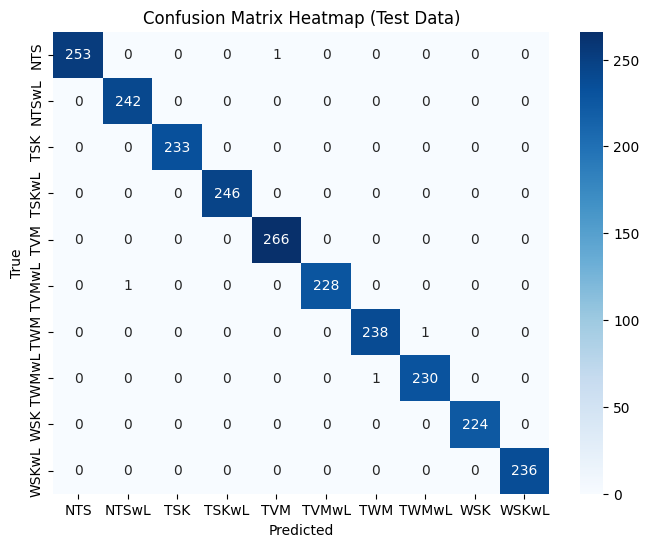

In [3]:
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import to_graphviz
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import subprocess
import time
print("XGBoost classifier 28 features")

train_file_path = '../Dataset/train_28f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = '../Dataset/test_28f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)

features_to_drop = ['Class']


X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#initialize xgb model
xgb_model = XGBClassifier(max_depth=7, random_state=42)


stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

  
    xgb_model.fit(X_train_fold, y_train_fold)

    y_val_pred = xgb_model.predict(X_val_fold)

   
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))


end_time = time.time()

mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")


training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

xgb_model.fit(X_train, y_train_encoded)


y_test_pred = xgb_model.predict(X_test)


accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')


print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")


conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

XGBoost classifier 18 features
Mean Accuracy: 99.80%
Mean Precision: 99.80%
Mean Recall: 99.80%
Mean F1 Score: 99.80%
Training Time: 3.98 seconds

Test Metrics:
Accuracy: 99.79%
Precision: 99.79%
Recall: 99.79%
F1 Score: 99.79%


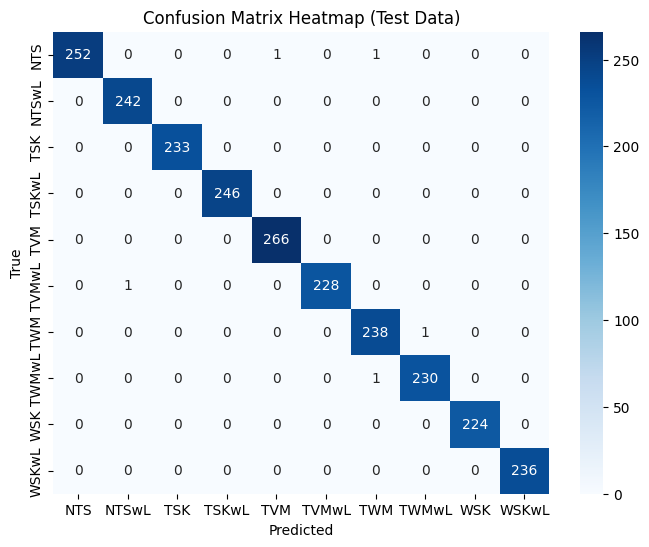

In [4]:
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import to_graphviz
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import subprocess
import time
print("XGBoost classifier 18 features")

train_file_path = '../Dataset/train_18f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = '../Dataset/test_18f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)

features_to_drop = ['Class']


X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
#initialize xgb model
xgb_model = XGBClassifier(max_depth=7, random_state=42)


stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

  
    xgb_model.fit(X_train_fold, y_train_fold)

    y_val_pred = xgb_model.predict(X_val_fold)

   
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))


end_time = time.time()

mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")


training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

xgb_model.fit(X_train, y_train_encoded)


y_test_pred = xgb_model.predict(X_test)


accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')


print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")


conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

In [6]:
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import to_graphviz
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import subprocess
import time
import joblib

print("XGBoost 7 features")

train_file_path = '../Dataset/train_18f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = '../Dataset/test_18f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)


features_to_drop = ['Class', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Load_1min', 'Load_5min', 'Load_15min', 'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']

#target variable is named 'Class'
X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#initialize xgb model
xgb_model = XGBClassifier(max_depth=7, random_state=42)


stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    xgb_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = xgb_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))


end_time = time.time()


training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")


xgb_model.fit(X_train, y_train_encoded)


y_test_pred = xgb_model.predict(X_test)


accuracy_test = accuracy_score(y_test_encoded, y_test_pred)



print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
joblib.dump(xgb_model, '../Models/xgb_model.pkl') 
joblib.dump(label_encoder, '../Models/label_encoder_xgb.pkl')



XGBoost 7 features
Training Time: 2.71 seconds

Test Metrics:
Accuracy: 99.92%


['../Models/label_encoder_xgb.pkl']